In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

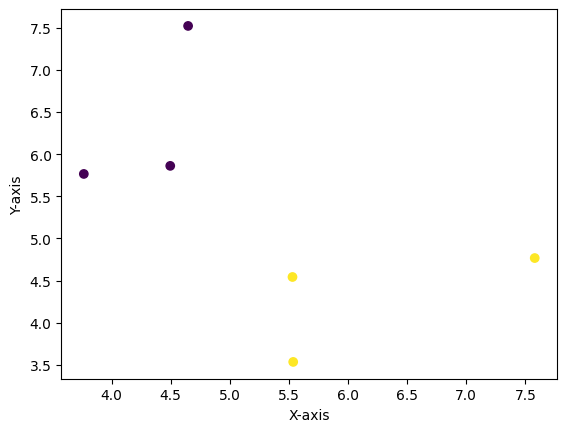

In [89]:
# Set a random seed for reproducibility
np.random.seed(42)
n_points = 3
# Class 1
class1_points = np.random.normal(loc=[4, 6], scale=[1, 1], size=(n_points, 2))
# Class 2
class2_points = np.random.normal(loc=[6, 4], scale=[1, 1], size=(n_points, 2))
# Combine the points from both classes
all_points = np.concatenate([class1_points, class2_points])
# Create labels for the classes (0 for class 1, 1 for class 2)
labels = np.array([-1] * n_points + [1] * n_points)
# Scatter plot to visualize the dataset
plt.scatter(all_points[:, 0], all_points[:, 1], c=labels, cmap='viridis')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [90]:
scaler = MinMaxScaler(feature_range=(-1,1))
all_points = scaler.fit_transform(all_points)
y = labels

In [91]:
X = np.ones((len(all_points), 1))
X = np.concatenate((X, all_points), axis = 1)
X

array([[ 1.        , -0.61668117,  0.16701214],
       [ 1.        , -0.53749949,  1.        ],
       [ 1.        , -1.        ,  0.11894073],
       [ 1.        ,  1.        , -0.38168022],
       [ 1.        , -0.07447704, -0.49443441],
       [ 1.        , -0.07130048, -1.        ]])

In [92]:
def plot_points(X):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_aspect('equal', adjustable='box')
    ax.scatter(X[:, 1], X[:, 2], c=labels, cmap='cividis')
    plt.xlabel('X1-axis')
    plt.ylabel('X2-axis')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    return ax, fig

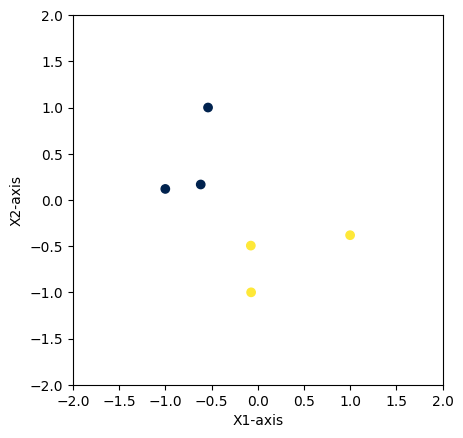

In [93]:
plot_points(X)
plt.show()

In [94]:
def plot_line(W, ax):
    start_point = [-10, (-W[0]-W[1]*(-10)) / W[2]]
    end_point = [10, (-W[0]-W[1]*(10)) / W[2]]
    ax.plot([start_point[0], end_point[0]], [start_point[1], end_point[1]], c='k')
    ax.plot([0, W[1]], [0, W[2]], c = 'g')

In [95]:
def plot_missed_points(points, ax):
    ax.scatter(points[:, 1], points[:, 2], c='r', cmap='cividis')

In [96]:
W = np.random.rand(3)
W[0] = 0
W = W / np.linalg.norm(W)

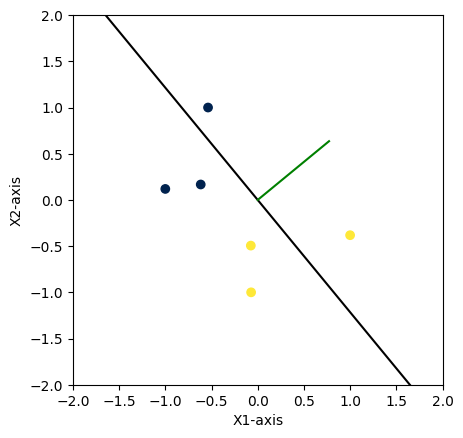

In [97]:
ax, fig = plot_points(X)
plot_line(W, ax)
plt.show()

In [98]:
def predict(X, W):
    return np.sign(X.dot(W))

In [99]:
y_pred = predict(X, W)
missed_pos = np.where(np.equal(y, y_pred) == False)[0]
missed_points = X[missed_pos]

C:\Users\84866\AppData\Local\Temp\ipykernel_1972\162028078.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[:, 1], points[:, 2], c='r', cmap='cividis')


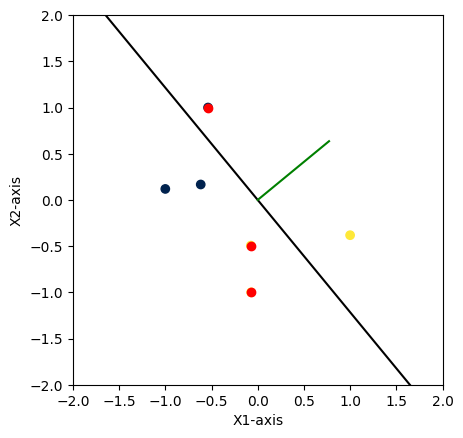

In [100]:
ax, fig = plot_points(X)
plot_line(W, ax)
plot_missed_points(missed_points, ax)
plt.show()

In [103]:
pos = np.random.choice(missed_pos, 1)
x = X[pos].reshape(1, 3)

C:\Users\84866\AppData\Local\Temp\ipykernel_1972\162028078.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(points[:, 1], points[:, 2], c='r', cmap='cividis')


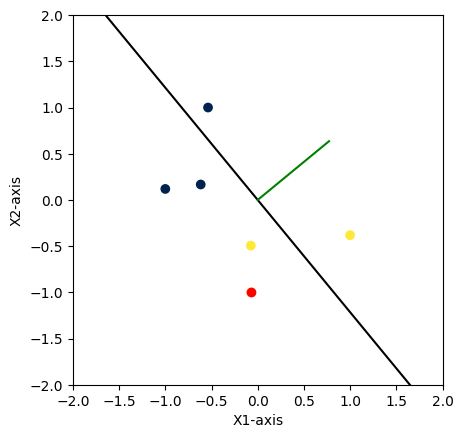

In [104]:
ax, fig = plot_points(X)
plot_line(W, ax)
plot_missed_points(x, ax)
plt.show()